Importing required libraries ...

In [1]:
import csv
import os
import numpy as np
# For creating the heatmaps
import matplotlib.pyplot as plt
import math

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session 

/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv


# Extracting the features from the csv file

In [2]:
file_name = "../input/red-wine-quality-cortez-et-al-2009/winequality-red.csv"
with open(file_name,'r') as csvfile:
    reader = csv.DictReader(csvfile, restkey = None, restval = None, dialect = 'excel')    
    # reader is a reader object and hence to convert into iterable have to convert to list.
    data = list(reader)
    
list_len = len(data)
print('Size of total data : {}'.format(list_len))

# Feature matrix
X = np.zeros((list_len,11), dtype = float)
# Target vector
Y = np.zeros((list_len,1), dtype = float)

# Transfer data into respective feature vectors
for i in range(0,list_len):
    # data is a list of dictionaries. data[i] is a dictionary. data[i].values provides the values to the corresponding keys. list(data[i].values) converts it into a list
    values = list(data[i].values())

    X[i,0] = values[0]
    X[i,1] = values[1]
    X[i,2] = values[2]
    X[i,3] = values[3]
    X[i,4] = values[4]
    X[i,5] = values[5]
    X[i,6] = values[6]
    X[i,7] = values[7]
    X[i,8] = values[8]
    X[i,9] = values[9]
    X[i,10] = values[10]
    Y[i,0] = values[11]

X_Labels = ["Fixed Acidity", "Volatile Acidity", "Citric Acid", "Residual Sugar", "Chlorides", "Free sulphur Dioxide", "Total sulphur Dioxide", "Density", "pH" ,"Sulphates", "Alcohol"]
Labels = ["Fixed Acidity", "Volatile Acidity", "Citric Acid", "Residual Sugar", "Chlorides", "Free sulphur Dioxide", "Total sulphur Dioxide", "Density", "pH" ,"Sulphates", "Alcohol","Quality"]

print(X_Labels)

print("Data head :")
print(X[0:5,:])

Size of total data : 1599
['Fixed Acidity', 'Volatile Acidity', 'Citric Acid', 'Residual Sugar', 'Chlorides', 'Free sulphur Dioxide', 'Total sulphur Dioxide', 'Density', 'pH', 'Sulphates', 'Alcohol']
Data head :
[[7.400e+00 7.000e-01 0.000e+00 1.900e+00 7.600e-02 1.100e+01 3.400e+01
  9.978e-01 3.510e+00 5.600e-01 9.400e+00]
 [7.800e+00 8.800e-01 0.000e+00 2.600e+00 9.800e-02 2.500e+01 6.700e+01
  9.968e-01 3.200e+00 6.800e-01 9.800e+00]
 [7.800e+00 7.600e-01 4.000e-02 2.300e+00 9.200e-02 1.500e+01 5.400e+01
  9.970e-01 3.260e+00 6.500e-01 9.800e+00]
 [1.120e+01 2.800e-01 5.600e-01 1.900e+00 7.500e-02 1.700e+01 6.000e+01
  9.980e-01 3.160e+00 5.800e-01 9.800e+00]
 [7.400e+00 7.000e-01 0.000e+00 1.900e+00 7.600e-02 1.100e+01 3.400e+01
  9.978e-01 3.510e+00 5.600e-01 9.400e+00]]


# What are features ?

Features are the input data which a machine learning algorithm trains on to predict an output. For example a machine learning algorithm which predicts price of a house could take features such as number of bedrooms, size of house, number of ammenities etc as input.

# 1. Feature Selection

## The number of features and the variance in each feature are important factors to consider before building the model.

* If too many features are fed into the model it may overfit and lose its ability to generalize. 
* If there isn't much variance in your features then that feature will likely not influence the target varable and hence can be eliminated.

In this tutorial I will be going over the maths of some the algorithms in feature selection and feature elimination and using these algorithms in a red wine quality dataset.

In feature selection, you have a set of features and you want to select a subset from those features which influence the target variable the greatest.

Advantanges of using feature selection are :

* It allows models to be simplified making them easier to be interpreted and leads to better generalization.
* Shorter training times

Feature selection process is a combinatorial optimization problem. A combinatorial optimization problem aims to use combinatorial techniques to solve discrete optimization problems. A discrete optimization problem seeks to find the best possible solution from a finite set of possibilities. To overcome this problem it is frequently assumed either that features independently influence the class variable or do so only involving pairwise feature interaction.

Three main categories of feature selection algorithms are wrappers, filters and embedded methods.

# 1.1 Filter Method

![Filter methods](https://upload.wikimedia.org/wikipedia/commons/2/2c/Filter_Methode.png)

> Reference : https://en.wikipedia.org/wiki/Feature_selection

Filter methods stand apart in the sense that they select the features independent of the model. They are selected based on the correlation with the target variable. The features that contribute the least to the target variable prediction are suppressed and the ones that pass are selected to be passed on to a classification or a regression model.

They are effective in computation time and robust to overfitting.

There are two types of filter methods:

1. Univariate filter methods : evaluate and rank single features. Each feature is treated independent of the feature space.

2. Mulitivariate filter methods : These methods evaluate the entire feature space. They take into account the relationships between the features.

# 1.1.1 Basic Filter Methods

These are methods to drop features which have for example constant values, a value which occupies a majority of the dataset and features which have duplicate values.

# 1.1.2 Correlation Filter Methods

A simple definition for what correlation means is the relationship between two variables. These methods try to measure the correlation between the feature and its target and select the ones which are highly correlated with the target. If two variables are highly correlated with each other then we require only one variable to predict the target and the other becomes redundant and can be eliminated (can be measured using multivariate methods).

Pearson's correlation coefficient (PCC) is the most common linear coefficient measuring the degree of correlation between two variables and is denoted by *r*.

*r* ranges between +1 and -1 and a value of +1 means that there is a pefect positive relation between the variables and are related by an increasing linear function. A value of -1 means that there is a perfect negative relation between the variables and are related by a decreasing function. A value of 0 means no predictive strength between the variables.

### $$r = \dfrac{\sum_{i=1}^{n} (x_i - \mu_x)(y_i - \mu_y)}{\sqrt{\sum_{i=1}^{n} (x_i - \mu_x)^2}\sqrt{\sum_{i=1}^{n} (y_i - \mu_y)^2}}$$

The above formula can also be written as:

### $$r = \dfrac{Cov(x,y)}{\sigma_x\sigma_y}$$

where,

### $$Cov(x,y) = \dfrac{\sum_{i=1}^{n} (x_i - \mu_x)(y_i - \mu_y)}{n-1}$$

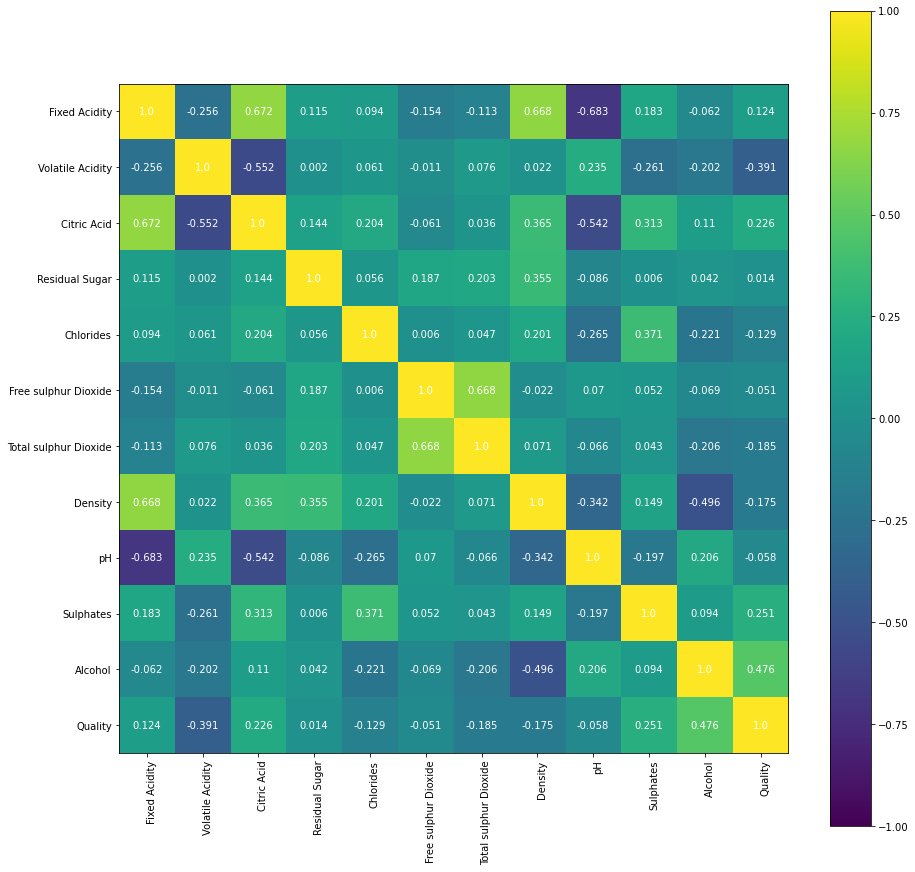

In [3]:
# Concatenating the features and target
feat_mat = np.concatenate((X,Y), axis = 1)

# Pearsons correlation coeff array
r = np.zeros((12,12))

# We will be using a three nested for loop to create the correlation heatmap
# Extracting first feature
for i in range(0,12):
    feature1 = feat_mat[:,i]
    # Extracting second feature
    for j in range(0,12):
        feature2 = feat_mat[:,j]
        check = np.array_equal(feature1,feature2)
        # If arrays are equal no need to check for correlation
        if check == True:
            r[i,j] = 1
            continue
        # Finding the means of the features
        mean_feature1 = sum(feature1)/list_len
        mean_feature2 = sum(feature2)/list_len
        # Initializing the num, den1, den2 variables
        num = 0
        den1 = 0
        den2 = 0
        # Calculating the Pearsons correlation coeff
        for k in range(0,list_len):
            num = num + (feature1[k] - mean_feature1)*(feature2[k] - mean_feature2)
            den1 = den1 + (feature1[k] - mean_feature1)**2
            den2 = den2 + (feature2[k] - mean_feature2)**2
        den1 = den1**0.5
        den2 = den2**0.5
        den = den1*den2
        coeff = num/den
        r[i,j] = coeff

# Rounding the numbers in the correlation matrix to 2 decimal places
r = np.round(r,decimals=3)

# Creating the heatmap
fig, ax = plt.subplots(figsize=(15,15))
im = ax.imshow(r, vmin=-1, vmax=1)

# Create colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# Setting the ticks on X axis
ax.set_xticks(np.arange(len(Labels)))
ax.set_yticks(np.arange(len(Labels)))
# Label them with repsective entries
ax.set_xticklabels(Labels)
ax.set_yticklabels(Labels)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=90, ha="right",rotation_mode="anchor")

for i in range(0,12):
    for j in range(0,12):
        text = ax.text(i,j,r[i,j], ha = "center", va = "center", color = "w")

plt.show()
    
    

We can see that there is some positive as well as negative correlation among the feature vectors.
Positive Pearson Correlation coefficient
1. Citric Acid vs Fixed Acidity :  0.6717
2. Density vs Fixed Acidity : 0.668
3. Total Sulphur dioxide vs Free Sulphur dioxide : 0.668

Negative Pearson Correlation Coefficient
1. pH vs Fixed Acidity : -0.683
2. pH vs Citric Acid : -0.5419
2. Citric Acid vs Volatile Acidity : -0.5525

Alcohol seems to be the most correlated with quality (r = 0.4762) compared to other features.

The features most correlated with quality are alcohol, sulphates and volatile acidity.

# 1.1.3 Statistical and Ranking Filter Methods



For classification sklearn has three algorithms. All of these are for univariate feature selection.

1. chi2 (Chi squared stats of non-negative features for classification tasks)
2. f_classif (ANOVA F-value between label/feature for classification tasks)
3. mutual_info_classif (Estimate mutual information for a discrete target variable)

The statistical feature selection methods can be divided into two classes : univariate and multivariate. As the name suggests univariate considers only a single feature and sees how well it correlates with the target variable. A disadvantage over here is that it discards features when taken as an aggregate would have contributed to the target variable. In order to overcome this multivariate feature selection processes use multivariate statistics where they consider dependencies between features when calculating scores for features

#### CHI SQUARED DISTRIBUTION

A standard normal distribution is a normal distribution with mean 0 and standard deviation of 1. It is given by the following probability density function.

### $$ P_r(x) = \dfrac{e^{-x^2/2}}{\sqrt{2\pi}} $$

Conider a random variable 'Z' sampled from the standard normal distribution and is squared to give random variable Q. ($ Q = Z^2 $). The distribution of the random variable Q is an example of chi2 distribution. Since we are only squaring a single normal random variable it produces a chi2 distribution of degree 1 however if you have two standard normal distributions and sample and square the random variables and then add them together you will get a chi2 distribution of degree 2. In the below code you can see how to get a chi2 distribution of degree 3 and 5.

The probability density function for the chi2 distribution with 'r' degrees of freedom is given by

### $$ P_r(x) = \dfrac{x^{r/2-1}e^{-x/2}}{\Gamma(r/2)2^{r/2}} $$

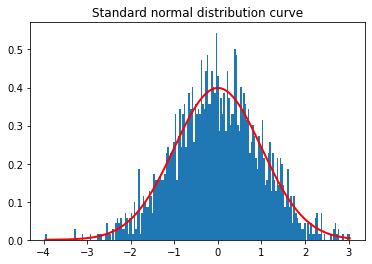

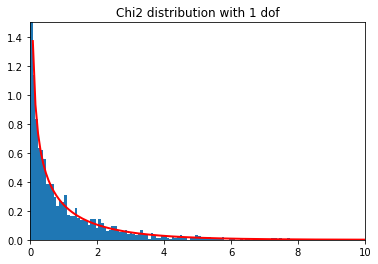

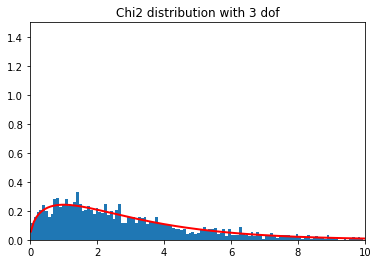

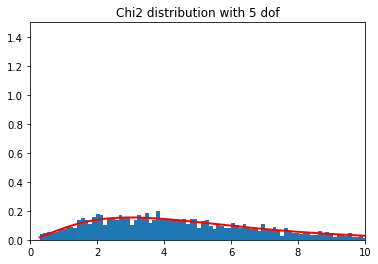

In [4]:
# Lets draw samples from a standard normal distribution and plot as histogram
mean = 0
std = 1
# Drawing 2000 samples from a gaussian distribution of mean 0 and std 1.
a_norm = np.random.normal(loc=mean,scale=std,size=2000)
# Setting density equal to 1 so that area under histogram sums to 1 (normalizing the counts) and can be compared with std normal distribution curve.
# bins defines the floating point numbers for which we are calculating the count
# X axis of plot : floating point numbers 
# Y axis of plot : counts/frequency of floating point numbers
count, bins, ignored = plt.hist(a_norm,200,density=1)
# Lets compare the histogram with the equation of the standard normal distribution curve by plotting over it.
plt.plot(bins,1/(np.sqrt(2*np.pi))*np.exp(-(bins**2)/2), linewidth = 2, color = 'r')
plt.title('Standard normal distribution curve')
plt.show()

b_norm = np.random.normal(loc=mean,scale=std,size=2000)
c_norm = np.random.normal(loc=mean,scale=std,size=2000)
d_norm = np.random.normal(loc=mean,scale=std,size=2000)
e_norm = np.random.normal(loc=mean,scale=std,size=2000)

# Now lets plot the chi squared distribution for 1, 3 and 5 degrees of freedom
a_norm2 = a_norm**2
b_norm2 = b_norm**2
c_norm2 = c_norm**2
d_norm2 = d_norm**2
e_norm2 = e_norm**2

count1, bins1, ignored1 = plt.hist(a_norm2,200,density=1)
bins1 = bins1[bins1>=10**(-6)]
# X axis of plot : squared std normal variable
# Y axis of plot : counts/frequency of floating point numbers
plt.plot(bins1,bins1**(1/2-1)*np.exp(-bins1/2)/(math.gamma(1/2)*2**(1/2)),linewidth=2,color='r')
plt.axis([0,10,0,1.5])
plt.title('Chi2 distribution with 1 dof')
plt.show()

count3, bins3, ignored3 = plt.hist(a_norm2 + b_norm2 + c_norm2,200,density=1)
bins3 = bins3[bins3>=10**(-6)]
plt.plot(bins3,bins3**(3/2-1)*np.exp(-bins3/2)/(math.gamma(3/2)*2**(3/2)),linewidth=2,color='r')
plt.axis([0,10,0,1.5])
plt.title('Chi2 distribution with 3 dof')
plt.show()
                           
count5, bins5, ignored5 = plt.hist(a_norm2 + b_norm2 + c_norm2 + d_norm2 + e_norm2,200,density=1)
bins5 = bins5[bins5>=10**(-6)]
plt.plot(bins5,bins5**(5/2-1)*np.exp(-bins5/2)/(math.gamma(5/2)*2**(5/2)),linewidth=2,color='r')
plt.axis([0,10,0,1.5])
plt.title('Chi2 distribution with 5 dof')
plt.show()

#### CHI SQUARE TEST

The chi-square test refers to a class of statistical tests in which the sampling distribution is a chi-square distribution. The term usually refers to Pearson's chi-square test. 

The chi squared test can be used to test for the probability of independence between two datasets and for performing a goodness-of-fit test. Here we will be using it for testing the probability of independence between two datasets. It will not tell any details about the relationship between them. For instance, in a survey conducted in which the ages of participants are recorded, a chi squared test can be used to determine if age affects the survey responses, or if the two are independent. 

Chi-square score is commonly used for testing relationships between categorical variables and like any statistical hypothesis test, the chi square test has both a null hypothesis and an alternative hypothesis.

The null hypothesis states that there is no relationship between the categorical variables while the alternative hypothesis states that there is a relationship between the variables.

The Chi-square test of independence works by comparing the distribution that you observe to the distribution that you expect if there is no relationship between the categorical variables. In the Chi-square context, the word “expected” is equivalent to what you’d expect if the null hypothesis is true. If your observed distribution is sufficiently different than the expected distribution (no relationship), you can reject the null hypothesis and infer that the variables are related.

The chi squared statistic for interdependence is defined by 

### $$\chi^2 = \sum \dfrac{(Observed - Expected)^2}{Expected}$$

Before we start calculating the chi squared score lets look at how a typical contingency table would look like

<table style="width:100%; border:1px solid black">
    
<tr>
<th rowspan="2" style="border:1px solid black; text-align:center"> Features </th> 
<th colspan="4" style="border:1px solid black; text-align:center"> Class Labels </th>
</tr>
    
<tr>
<td style="border:1px solid black; text-align:center"> Class 1 </td> 
<td style="border:1px solid black; text-align:center"> Class 2 </td>
<td style="border:1px solid black; text-align:center"> ....... </td>
<td style="border:1px solid black; text-align:center"> Class n </td>
</tr>
    
<tr>
<td style="border:1px solid black; text-align:center"> Feature 1 </td> 
<td style="border:1px solid black; text-align:center"> $$ Observation_{1,1} $$ </td> 
<td style="border:1px solid black; text-align:center"> $$ Observation_{1,2} $$ </td> 
<td style="border:1px solid black; text-align:center"> ....... </td>
<td style="border:1px solid black; text-align:center"> $$ Observation_{1,n} $$ </td>
<td style="border:1px solid black; text-align:center"> Row 1 total </td>
</tr>
    
<tr>
<td style="border:1px solid black; text-align:center"> Feature 2 </td> 
<td style="border:1px solid black; text-align:center"> $$ Observation_{2,1} $$ </td> 
<td style="border:1px solid black; text-align:center"> $$ Observation_{2,2} $$ </td> 
<td style="border:1px solid black; text-align:center"> ....... </td>
<td style="border:1px solid black; text-align:center"> $$ Observation_{2,n} $$ </td>
<td style="border:1px solid black; text-align:center"> Row 2 total </td>
</tr>
    
<tr>
<td style="border:1px solid black; text-align:center"> : </td>
<td style="border:1px solid black; text-align:center"> : </td>
<td style="border:1px solid black; text-align:center"> : </td>
<td style="border:1px solid black; text-align:center"> : </td>
<td style="border:1px solid black; text-align:center"> : </td>
<td style="border:1px solid black; text-align:center"> : </td>
</tr>
    
<tr>
<td style="border:1px solid black; text-align:center"> Feature n </td> 
<td style="border:1px solid black; text-align:center"> $$ Observation_{n,1} $$ </td> 
<td style="border:1px solid black; text-align:center"> $$ Observation_{n,2} $$ </td> 
<td style="border:1px solid black; text-align:center"> ....... </td>
<td style="border:1px solid black; text-align:center"> $$ Observation_{n,n} $$ </td>
<td style="border:1px solid black; text-align:center"> Row n total </td>
</tr>
    
<tr>
<td> </td>
<td style="border:1px solid black; text-align:center"> Column 1 total </td>
<td style="border:1px solid black; text-align:center"> Column 2 total </td>
<td style="border:1px solid black; text-align:center"> ....... </td>
<td style="border:1px solid black; text-align:center"> Column n total </td>
<td style="border:1px solid black; text-align:center"> <b> N </b> </td>
</tr>
    
</table>

<br>

The chi square test for independence proceeds as follows :

1. Calculate the chi-squred statistic $\chi^2$ by using the formula shown above.

2. Determine number of degrees of freedom  $df = (r-1)(c-1)$

3. As an independence test, the usual confidence level is p = 0.95. If the chi-squared statistic exceeds the critical value under these conditions, the independence assumption can be rejected, and the two data sets are unlikely to be independent.

### EXAMPLE

Lets take alcohol content and volatile acidity and see how well they are correlated with wine quality.

#### Feature 1 : Alcohol content

The alcohol is measured as percent alcohol content of wine. In the data we have the maximum alcohol content is 14.9. According to the classification done by winefolly.

<table>
<tr>
    <td style="border:1px solid black; text-align:center"> Low Alcohol Content Wines </td>
    <td style="border:1px solid black; text-align:center"> 10 % </td>
</tr>
    
<tr>
    <td style="border:1px solid black; text-align:center"> Medium Low Alcohol Content Wines </td>
    <td style="border:1px solid black; text-align:center"> 10-11.55 % </td>
</tr>
    
<tr> 
    <td style="border:1px solid black; text-align:center"> Medium Alcohol Content Wines </td>
    <td style="border:1px solid black; text-align:center"> 11.55-13.5 % </td>
</tr>
    
<tr>
    <td style="border:1px solid black; text-align:center"> Medium High Alcohol Content Wines </td>
    <td style="border:1px solid black; text-align:center"> 13.5-15 % </td>
</tr>
    
<tr>
    <td style="border:1px solid black; text-align:center"> High Alcohol Content Wines </td>
    <td style="border:1px solid black; text-align:center"> Over 15 % </td>
</tr>
</table>

<br>

In our dataset most of the wines have alcohol content less than 11.55 % alcohol content. Lets split the alcohol feature vector such that values less than 11.55 % alcohol content we will regard it as medium low alcohol content wine (1) and greater than 11.55 %  as medium high alcohol content wines (0). I have chosen this format as most of the alcohol datapoints lie in the medium-low alchol content range so we can see if medium-low alcohol content correlates well with quality.

#### Feature 2 : Volatile acidity

Volatile acidity (VA) is a measure of the wine's gaseous acids that contributes to the smell and taste of vinegar in wine. Volatile acidity at too high levels can lead to an unpleasant, vinegar taste.

Volatile acidity is measured as $ \dfrac{g(acetic acid)}{L^{3}} $. Volatile acidity concentration is regulated by the Federal Tax and Trade Bureau, and allowable levels for various wine styles can be found in the Code of Federal Regualtions (CFR). The mentioned regulations for red and white wines are 1.4 and 1.2 g(acetic acid)/L respectively.

Lets split the VA feaure vector such that values less than 0.7 we will regard it as low VA (1) and greater than 0.7 we will regard it as high VA(0). I have chosen this format as most of the VA acid datapoints lie in the low-VA range so we can see if low-VA correlates well with quality.

In [5]:
# Feature vector - med - low alcohol content
alcohol = X[:,10].reshape(list_len,1)
# less than 11.55 % - 1 (medium low), greater than 11.55 % - 0 (medium high)
alcohol = np.where(alcohol<=11.55,1,0)

# Feature vector - low volatile acidity content
VA = X[:,2].reshape(list_len,1)
VA = np.where(VA<=0.7,1,0)

chi2_feat_mat = np.append(alcohol,VA,axis=1)

# Target vector - quality. If quality is greater than 7 then we call it as good quality wine(1). If quality is less than 7 we call it as bad quality wine (0)
quality = np.where(Y>=7,1,0)
# We are generating two class labels : Bad quality wine and Good quality wine.
quality = np.append(1-quality,quality,axis=1)

# Observed values are calcualted by taking the dot product of class labels with the feature.
# This is the same as counting how many alcohol samples with medium low alcohol content and low VA 
# belong to bad and good quality wines. 
# Output : [[Observed number of bad quality wine with med-low alc samples, Observed number of bad quality wine with low VA],[Observed number of good quality wine with med-low alc samples, Observed number of good quality wine with low VA]]
observed = np.dot(quality.T,chi2_feat_mat)
print("Observed values : ")
print("\n")
print(observed)
print("\n")

# Now we move onto to calculate the expected values.

# Calculating the number of samples with medium low alcohol content and number of samples with low VA content
# Output : [number of med-low alcohol samples,  number of low VA samples]
feature_count = chi2_feat_mat.sum(axis=0).reshape(1,-1)
# Calculating probability of bad and good quality wine
# Output : [percent bad quality, percent good quality]
class_prob = quality.mean(axis=0).reshape(1,-1)

# Calculating expected values
# Output : [[ Expected percent bad quality wine with med-low alc samples, Expected percent bad quality wine with low VA],[Expected percent good quality wine with med-low alc samples, Expected percent good quality wine with low VA]]
expected = np.dot(class_prob.T,feature_count)
print("Expected values : ")
print("\n")
print(expected)

# Calculating chi square statistic
chisq = ((observed - expected)**2)/expected
chisq = chisq.sum(axis=0)

print("\n")
print("Chi square statistic for alcohol is : ")
print(round(chisq[0],3))
print("\n")
print("Chi square statistic for VA is : ")
print(round(chisq[1],3))

Observed values : 


[[1242 1375]
 [ 107  208]]


Expected values : 


[[1165.92745466 1368.1713571 ]
 [ 183.07254534  214.8286429 ]]


Chi square statistic for alcohol is : 
36.574


Chi square statistic for VA is : 
0.251


Lets calculate the number of degrees of freedom

In [6]:
print("Number of degrees of freedom is (r - 1)*(c - 1): ")
print((2-1)*(2-1))

Number of degrees of freedom is (r - 1)*(c - 1): 
1


Considering p-value of 0.95 and 1 degree of freedom lets find out the critical values of the chi2 distribution.

![Chi2 critical values](https://faculty.elgin.edu/dkernler/statistics/ch09/images/chi-square-table.gif)

* We see that the critical value is 0.004 for dof = 1 and p-val of 0.95
* The chi square statistics for alcohol and volatile acidity are both greater than the critical value and hence we can reject the null hypothesis.

# 1.1.4 MUTUAL INFORMATION 

Mutual information (MI) (also known as Information gain) between two random variables is a non negative value, which measures the dependency between the variables. It is equal to 0 if and only if two random variables are independent, and higher values mean higher dependency. It can be used for univariate feature selection.

The input to a MI estimator is a list of (x,y) data points, whose underlying probability distribution $ \mu(x,y) $ we can only guess based on how the data points are clustered. 

It relies on non parametric methods based on entropy estimation from k-nearest neigbours

Discrete probability functions are functions that take discrete number of values and are referred to as probability mass functions.
Continuous probability functions are defined for an infinite number of points over a continuous interval and are referred to as probability density functions.

sklearn implementation:

sklearn.feature_selection.mutual_info_classif(X,y,*,discrete_features = 'auto', n_neighbours=3,copy=True,random_state=None)

1. X : feature matrix
2. y : target vector
3. discrete_features : default'auto'. If auto, it is assigned False for dense X and to True for sparse X. A sparse matrix is a matrix in which most of the elements are non zero. By contrast if most of the elements are nonzero then the matrix is called a dense matrix.
4. n_neighbours : Number of neighbours to use for MI estimation for continuous variables.
5. copy : bool, default True
6. random_state : For adding small noise to continuous variables to remove repeated values. Default None

Maths behind MI:

Since our matrix is a dense matrix we will see the formula for mutual information for continuous distributions 

### $$ I(X;Y) = \int_y\int_x p_{(X,Y)}(x,y)\log{\dfrac{p_{(X,Y)}(x,y)}{p_X(x)p_Y(y)}}dxdy$$

$p_{X,Y}$ is the joint probability density function of X and Y.
$p_X$ and $p_Y$ are the marginal probability density functions of X and Y respectively.

Joint Probability Distribution (Discrete case)

X and Y are two discrete random variables. X takes values {x1, x2 .. xn} (can take 'n' values) and Y takes values {y1,y2 .. ym} (can take 'm' values). The ordered pair takes values in the product {(x1,y1),(x2,y2), .. (xn,yn)}. The joint probability mass function (joint pmf) of X and Y is the function p(xi,yj) giving the probability of the joint outcome X = xi and Y = yj.

This is organized in a joint probability table as follows :



> Reference : https://ocw.mit.edu/courses/mathematics/18-05-introduction-to-probability-and-statistics-spring-2014/readings/MIT18_05S14_Reading7a.pdf

Joint Probability Distribution (Continuous case)

In the continuous case discrete sets are replaced with continuous intervals and the joint probability mass function (joint pmf) is replaced with joint probability density functions (joint pdf).

If X takes values in [a,b] and Y takes values in [c,d] then the pair (X,Y) takes values in the product [a,b] x [c,d]. The joint probability density function is the function f(x,y) giving the probability density at (x,y). That is, the probability that (X, Y) is in a small rectangle of width dx and height dy around (x, y) is f(x,y)dx dy 



> Reference : https://ocw.mit.edu/courses/mathematics/18-05-introduction-to-probability-and-statistics-spring-2014/readings/MIT18_05S14_Reading7a.pdf

Note : probability density functions can take values greater than 1 as they are probability densities and not probabilities.

Marginal Probability Distribution

The individual probability distribution of a random variable is reffered to as its marginal probability distribution.

When the joint probability function concides with the product of the marginal probability functions that is when X and Y are independent (and hence observing Y tells you nothing about X).


# 1.2 Wrapper Method

![](http://upload.wikimedia.org/wikipedia/commons/0/04/Feature_selection_Wrapper_Method.png)

> Reference : https://en.wikipedia.org/wiki/Feature_selection

Wrapper methods are based on greedy search algorithms as they evaluate all possible combinations of the features and select the combination that produces the best result for a specific machine learning algorithm. Some disadvantages associated with wrapper methods are :

1. Testing all possible combinations of the features can be computationally expensive if the features set is too large.

2. When number of observations is insufficient there is increased risk of overfitting.

Wrapper methods for feature selection can be divided into three categories:

### 1. Step forward feature selection / Forward Feature Selection

In the first step, the performance of the classifier is evaluated with respect to each feature. The feature that performs the best is selected out of all the features. Selected feature depends on the evaluation criteria (prediction accuracy, RMSE etc). Next all possible combinations of the selected feature and subsequent feature are evaluated and second feature is selected. This process is continued until the required pre-defined number of features is selected.

### 2. Step backward feature selection / Backward Feature Elimination

Here we start with all the features in the dataset, and then we evaluate the performance of the machine learning algorithm. After that, at each iteration, backward feature elimination removes one feature at a time. It continues removing features until a certain criterion is satified.

### 3. Exhaustive feature selection

The performance of the machine learning algorithm is evaluated against all possible subsets of features in the dataset. You can define the minimum and maximum number of features to have in a subset. The feature subset that yields best performance is selected. A downside to exhaustive feature selction is that it can be slower than compared to step forward or step backward feature selections.

**As a rule of thumb, if the dataset is small, exhaustive feature selection method should be the choice, however, in case of large datasets, step forward or step backward feature selection methods should be preferred.**

# 1.3 Embedded Method

![](https://upload.wikimedia.org/wikipedia/commons/b/bf/Feature_selection_Embedded_Method.png)

> Reference : https://en.wikipedia.org/wiki/Feature_selection

In embedded methods the feature selction process is added within the construction of the machine learning algorithm. They complete the feature selection process during the model training. The learning algorithm takes advantage of its variable selection process and performs feature selection and classificaton/regression at the same time.

# 2. Feature Extraction

# 3. References 

List of feature selection methods :
1. https://heartbeat.fritz.ai/hands-on-with-feature-selection-techniques-filter-methods-f248e0436ce5

Links for infromation on Correlation :
1. https://brilliant.org/wiki/correlation/

Links for Chi squared test : 
1. https://brilliant.org/wiki/chi-squared-test/
2. https://www.investopedia.com/terms/c/chi-square-statistic.asp
3. https://statisticsbyjim.com/hypothesis-testing/chi-square-test-independence-example/

Contingency Table
1. https://math.hws.edu/javamath/ryan/ChiSquare.html
2. https://medium.com/analytics-vidhya/pearsons-chi-squared-test-from-scratch-with-python-ba9e14d336c
3. https://www.kaggle.com/kuldeepnpatel/chi-square-test-of-independence
4. https://machinelearningmastery.com/chi-squared-test-for-machine-learning/


Links for Mutual information :
1. https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html#sklearn.feature_selection.mutual_info_classif
2. https://en.wikipedia.org/wiki/Mutual_information
3. https://en.wikipedia.org/wiki/Joint_probability_distribution
4. https://ocw.mit.edu/courses/mathematics/18-05-introduction-to-probability-and-statistics-spring-2014/readings/MIT18_05S14_Reading7a.pdf
5. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3929353/

Wrapper Methods :
1. https://stackabuse.com/applying-wrapper-methods-in-python-for-feature-selection/

Embedded Methods : 
1. https://heartbeat.fritz.ai/hands-on-with-feature-selection-techniques-embedded-methods-84747e814dab

Symbols used for Latex equation :
1. https://www.calvin.edu/~rpruim/courses/s341/S17/from-class/MathinRmd.html

Wine Quality :
1. https://winefolly.com/tips/the-lightest-to-the-strongest-wine/
2. https://extension.psu.edu/volatile-acidity-in-wine



